## EIA testing


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pytest
from decimal import Decimal
from pudl import init, analysis, settings, output
import pudl.constants as pc
import pudl.output.pudltabl

%matplotlib inline

In [3]:
# plt.style.use('ggplot')
# mpl.rcParams['figure.figsize'] = (6,5)
# mpl.rcParams['figure.dpi'] = 150
pd.options.display.max_columns = 56

In [4]:
pd.options.mode.use_inf_as_na = False

In [5]:
pudl_out_eia = pudl.output.eia923 # Path to EIA923 tables, for use in test_frc_eia923 function

## EIA 923 Fuel Receipts and Costs

In [6]:
frc_eia923 = pudl_out_eia.fuel_receipts_costs_eia923(freq=None) # Data frame of EIA923 FRC table

In [7]:
max_unit_fuel_cost = 35 # In $/mmbtu, threshold for identifying outlier records
max_unit_heat_content = 32 # In mmbtu/fuel unit, threshold for identifying outlier records

In [8]:
# Function that approximates the test in pudl/scripts/test/validation/eia923_test.py
def test_frc_eia923(pudl_out_eia, max_unit_fuel_cost = max_unit_fuel_cost, 
                    max_unit_heat_content = max_unit_heat_content, freq=None):
    """
    Sanity checks for EIA 923 fuel costs and heat rates by unit.
    
    Args:
        max_unit_fuel_cost (int): The threshold for identifying 'fuel_cost_per_mmbtu' records that exceed
    
        freq (None or str): Temporal scale of records to evaluate. It must be one of the following:
            - None
            - 'MS'
            - 'YS'
            
    Returns print statement counting outlier records
    """
        
    # Verify the number of outliers for the fuel cost per mmbtu
    frc_eia923 = pudl_out_eia.fuel_receipts_costs_eia923(freq=freq)

    fuel_unit_outliers = len(frc_eia923.loc[(frc_eia923.fuel_cost_per_mmbtu > max_unit_fuel_cost) | 
                                        (frc_eia923.fuel_cost_per_mmbtu < 0)]) 
    
    decimal = Decimal((fuel_unit_outliers/(len(frc_eia923)))*100)
    proportion = round(decimal, 2)
                    
    print (f"{fuel_unit_outliers} records, {proportion}% of the total, have outlier fuel unit costs")
    
    heat_content_outliers = len(frc_eia923.loc[(frc_eia923.heat_content_mmbtu_per_unit > max_unit_heat_content) |
                                           (frc_eia923.heat_content_mmbtu_per_unit < 0)])

    decimal = Decimal((heat_content_outliers/(len(frc_eia923)))*100)
    proportion = round(decimal, 2)

    print (f"{heat_content_outliers} records, {proportion}% of the total, have outlier heat unit values")


In [9]:
# Run the function
test_frc_eia923(pudl_out_eia)

1047 records, 0.41% of the total, have outlier fuel unit costs
0 records, 0.00% of the total, have outlier heat unit values


In [10]:
test_frc_eia923(pudl_out_eia, freq='MS')

603 records, 0.56% of the total, have outlier fuel unit costs
0 records, 0.00% of the total, have outlier heat unit values


In [11]:
test_frc_eia923(pudl_out_eia, freq='YS')

16 records, 0.15% of the total, have outlier fuel unit costs
0 records, 0.00% of the total, have outlier heat unit values


In [12]:
# Plot the non-outlier values to see distribution
plot_var = frc_eia923.fuel_cost_per_mmbtu.loc[(frc_eia923.fuel_cost_per_mmbtu < max_unit_fuel_cost) & 
                          (frc_eia923.fuel_cost_per_mmbtu > 0)]

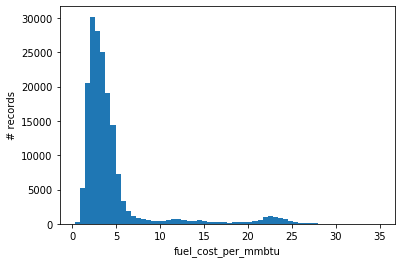

In [13]:
plt.hist(plot_var, bins=60)
plt.ylabel('# records')
plt.xlabel(plot_var.name);

In [14]:
# Plot the non-outlier values to see distribution
plot_var = frc_eia923.heat_content_mmbtu_per_unit[(frc_eia923.heat_content_mmbtu_per_unit <=  max_unit_heat_content) & 
                         (frc_eia923.heat_content_mmbtu_per_unit >=0)]

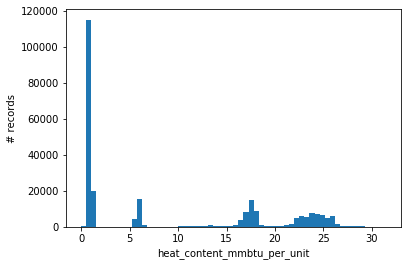

In [15]:
plt.hist(plot_var, bins=60)
plt.ylabel('# records')
plt.xlabel(plot_var.name);